In [1]:
# import relevant libraries

# basic libraries
import pandas as pd
import numpy as np

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning libraries
import sklearn.tree
import sklearn.metrics
import sklearn.model_selection
import sklearn.linear_model

# data collection libraries
import requests
from selenium import webdriver
import bs4
import imdbpie
import json

%matplotlib inline

# Identify: Problem Statement & Goals

**Using data from IMDB, can we build a model that predicts movie ratings based on certain inputs?**

- Predict movie ratings using information about the movie (e.g. genre, length of movie etc.)
- What are the factors that affect movie rating?

# Acquire: Query IMDB, write results, scrape IMDB

## Using IMDBpie

In [47]:
imdb = imdbpie.Imdb()

In [48]:
imdb_df = pd.read_json(json.dumps(imdb.top_250()))

In [49]:
imdb_df.head()

,can_rate,image,num_votes,rating,tconst,title,type,year
0,True,{u'url': u'https://images-na.ssl-images-amazon...,1720615,9.3,tt0111161,The Shawshank Redemption,feature,1994
1,True,{u'url': u'https://images-na.ssl-images-amazon...,1175974,9.2,tt0068646,The Godfather,feature,1972
2,True,{u'url': u'https://images-na.ssl-images-amazon...,806018,9.0,tt0071562,The Godfather: Part II,feature,1974
3,True,{u'url': u'https://images-na.ssl-images-amazon...,1706594,9.0,tt0468569,The Dark Knight,feature,2008
4,True,{u'url': u'https://images-na.ssl-images-amazon...,458359,8.9,tt0050083,12 Angry Men,feature,1957


In [50]:
top_250_id = imdb_df['tconst']

In [51]:
# path to phantomjs
phan_path = '//Applications/phantomjs'

In [52]:
def get_content(id_num):
    r = requests.get(api_url.format(id_num))
#     tmp = pd.DataFrame(json.loads(r.text), index=[0])
    tmp = json.loads(r.text)
    return tmp

In [53]:
df = pd.DataFrame([get_content(i) for i in top_250_id])

In [55]:
df.head()

,Actors,Awards,Country,Director,Genre,Language,Metascore,Plot,Poster,Rated,Released,Response,Runtime,Title,Type,Writer,Year,imdbID,imdbRating,imdbVotes
0,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Nominated for 7 Oscars. Another 18 wins & 30 n...,USA,Frank Darabont,"Crime, Drama",English,80,Chronicles the experiences of a formerly succe...,https://images-na.ssl-images-amazon.com/images...,R,14 Oct 1994,True,142 min,The Shawshank Redemption,movie,"Stephen King (short story ""Rita Hayworth and S...",1994,tt0111161,9.3,"1,711,064"
1,"Marlon Brando, Al Pacino, James Caan, Richard ...",Won 3 Oscars. Another 23 wins & 27 nominations.,USA,Francis Ford Coppola,"Crime, Drama","English, Italian, Latin",100,When the aging head of a famous crime family d...,https://images-na.ssl-images-amazon.com/images...,R,24 Mar 1972,True,175 min,The Godfather,movie,"Mario Puzo (screenplay), Francis Ford Coppola ...",1972,tt0068646,9.2,"1,169,904"
2,"Al Pacino, Robert Duvall, Diane Keaton, Robert...",Won 6 Oscars. Another 10 wins & 20 nominations.,USA,Francis Ford Coppola,"Crime, Drama","English, Italian, Spanish, Latin, Sicilian",80,The continuing saga of the Corleone crime fami...,https://images-na.ssl-images-amazon.com/images...,R,20 Dec 1974,True,202 min,The Godfather: Part II,movie,"Francis Ford Coppola (screenplay), Mario Puzo ...",1974,tt0071562,9.0,"800,469"
3,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",Won 2 Oscars. Another 146 wins & 142 nominations.,"USA, UK",Christopher Nolan,"Action, Crime, Drama","English, Mandarin",82,When the menace known as the Joker wreaks havo...,https://images-na.ssl-images-amazon.com/images...,PG-13,18 Jul 2008,True,152 min,The Dark Knight,movie,"Jonathan Nolan (screenplay), Christopher Nolan...",2008,tt0468569,9.0,"1,699,835"
4,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",Nominated for 3 Oscars. Another 16 wins & 8 no...,USA,Sidney Lumet,"Crime, Drama",English,N/A,The defense and the prosecution have rested an...,https://images-na.ssl-images-amazon.com/images...,APPROVED,01 Apr 1957,True,96 min,12 Angry Men,movie,"Reginald Rose (story), Reginald Rose (screenplay)",1957,tt0050083,8.9,"455,987"


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 20 columns):
Actors        250 non-null object
Awards        250 non-null object
Country       250 non-null object
Director      250 non-null object
Genre         250 non-null object
Language      250 non-null object
Metascore     250 non-null object
Plot          250 non-null object
Poster        250 non-null object
Rated         250 non-null object
Released      250 non-null object
Response      250 non-null object
Runtime       250 non-null object
Title         250 non-null object
Type          250 non-null object
Writer        250 non-null object
Year          250 non-null object
imdbID        250 non-null object
imdbRating    250 non-null object
imdbVotes     250 non-null object
dtypes: object(20)
memory usage: 39.1+ KB


# Mine: Rename & describe data

In [57]:
df2 = df.copy()

In [65]:
languages = []

In [68]:
for i in df2['Language']:
    languages.extend(i.split(','))

In [69]:
len(languages)

456

In [70]:
languages = set(languages)

In [71]:
len(languages)

53

In [72]:
for i in languages:
    df2['language_'+i] = df2['Language'].map(lambda x: 1 if i in x else 0)

In [86]:
def oscars_won(i):
    i_list = i.split()
    if 'Oscars.' in i.split() and i_list[i_list.index('Oscars.')-2] == 'Won':
        return i_list[i_list.index('Oscars.')-1]
    else:
        return 0

In [87]:
df2['Oscars_won'] = df2['Awards'].map(oscars_won)

In [91]:
country = []
for i in df2['Country']:
    country.extend(i.split(','))
country = set(country)

In [92]:
for i in country:
    df2['country_'+i] = df2['Country'].map(lambda x: 1 if i in x else 0)

In [99]:
for i in df2.columns:
    print '"'+i+'"',',',

"Actors" , "Awards" , "Country" , "Director" , "Genre" , "Language" , "Metascore" , "Plot" , "Poster" , "Rated" , "Released" , "Response" , "Runtime" , "Title" , "Type" , "Writer" , "Year" , "imdbID" , "imdbRating" , "imdbVotes" , "language_ Latin" , "language_Swedish" , "language_ Hungarian" , "language_ Sindarin" , "language_ Quenya" , "language_ French" , "language_ Spanish" , "language_ Norwegian" , "language_Hindi" , "language_ Russian" , "language_Korean" , "language_ Thai" , "language_ Danish" , "language_Danish" , "language_ Nepali" , "language_ Zulu" , "language_French" , "language_ Italian" , "language_ American Sign Language" , "language_ Greek" , "language_ English" , "language_ Scottish Gaelic" , "language_Cantonese" , "language_ Irish" , "language_ Pawnee" , "language_ Sicilian" , "language_ German" , "language_ Czech" , "language_ Japanese" , "language_N/A" , "language_ Urdu" , "language_Russian" , "language_ Cantonese" , "language_ Hebrew" , "language_English" , "langua

In [103]:
features = ["Year" , "imdbVotes" , "language_ English", "Oscars_won" , "country_USA"]

In [102]:
df2.to_csv('test_data.csv', encoding='utf-8')

In [65]:
df2 = pd.read_csv('test_data.csv', encoding='utf-8').iloc[:,1:21]

In [66]:
df2.head()

,Actors,Awards,Country,Director,Genre,Language,Metascore,Plot,Poster,Rated,Released,Response,Runtime,Title,Type,Writer,Year,imdbID,imdbRating,imdbVotes
0,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Nominated for 7 Oscars. Another 18 wins & 30 n...,USA,Frank Darabont,"Crime, Drama",English,80.0,Chronicles the experiences of a formerly succe...,https://images-na.ssl-images-amazon.com/images...,R,14 Oct 1994,True,142 min,The Shawshank Redemption,movie,"Stephen King (short story ""Rita Hayworth and S...",1994,tt0111161,9.3,"1,711,064"
1,"Marlon Brando, Al Pacino, James Caan, Richard ...",Won 3 Oscars. Another 23 wins & 27 nominations.,USA,Francis Ford Coppola,"Crime, Drama","English, Italian, Latin",100.0,When the aging head of a famous crime family d...,https://images-na.ssl-images-amazon.com/images...,R,24 Mar 1972,True,175 min,The Godfather,movie,"Mario Puzo (screenplay), Francis Ford Coppola ...",1972,tt0068646,9.2,"1,169,904"
2,"Al Pacino, Robert Duvall, Diane Keaton, Robert...",Won 6 Oscars. Another 10 wins & 20 nominations.,USA,Francis Ford Coppola,"Crime, Drama","English, Italian, Spanish, Latin, Sicilian",80.0,The continuing saga of the Corleone crime fami...,https://images-na.ssl-images-amazon.com/images...,R,20 Dec 1974,True,202 min,The Godfather: Part II,movie,"Francis Ford Coppola (screenplay), Mario Puzo ...",1974,tt0071562,9.0,"800,469"
3,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",Won 2 Oscars. Another 146 wins & 142 nominations.,"USA, UK",Christopher Nolan,"Action, Crime, Drama","English, Mandarin",82.0,When the menace known as the Joker wreaks havo...,https://images-na.ssl-images-amazon.com/images...,PG-13,18 Jul 2008,True,152 min,The Dark Knight,movie,"Jonathan Nolan (screenplay), Christopher Nolan...",2008,tt0468569,9.0,"1,699,835"
4,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",Nominated for 3 Oscars. Another 16 wins & 8 no...,USA,Sidney Lumet,"Crime, Drama",English,NaN,The defense and the prosecution have rested an...,https://images-na.ssl-images-amazon.com/images...,APPROVED,01 Apr 1957,True,96 min,12 Angry Men,movie,"Reginald Rose (story), Reginald Rose (screenplay)",1957,tt0050083,8.9,"455,987"


In [67]:
df2['imdbVotes'] = df2['imdbVotes'].map(lambda x: float(x.replace(',','')))

In [82]:
def oscars_won(i):
    i_list = str(i).split()
    if 'Oscars.' in i_list and i_list[i_list.index('Oscars.')-2] == 'Won':
        return float(i_list[i_list.index('Oscars.')-1])
    else:
        return 0

In [83]:
df2['Oscars_won'] = df2['Awards'].map(oscars_won)

In [84]:
# Let's consider whether movies are in english or not
df2['Language_English'] = df2['Language'].map(lambda x: 1 if "English" in str(x) else 0)

In [85]:
from collections import Counter

In [86]:
country = []
for i in df2['Country']:
    country.extend(i.split(','))
country_counts = Counter(country)

In [87]:
# Let's consider where the movies are made
# For model simplicity, we'll consider just the top 5 countries
top_5_countries = [i[0] for i in country_counts.most_common(5)]
top_5_countries

[u'USA', u' UK', u' USA', u'UK', u'Japan']

In [88]:
for i in top_5_countries:
    df2['Country_'+i] = df2['Country'].map(lambda x: 1 if i in str(x) else 0)

In [89]:
df2.head()

,Actors,Awards,Country,Director,Genre,Language,Metascore,Plot,Poster,Rated,...,imdbID,imdbRating,imdbVotes,Language_English,Oscars_won,Country_USA,Country_ UK,Country_ USA,Country_UK,Country_Japan
0,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Nominated for 7 Oscars. Another 18 wins & 30 n...,USA,Frank Darabont,"Crime, Drama",English,80.0,Chronicles the experiences of a formerly succe...,https://images-na.ssl-images-amazon.com/images...,R,...,tt0111161,9.3,1711064.0,1,0.0,1,0,0,0,0
1,"Marlon Brando, Al Pacino, James Caan, Richard ...",Won 3 Oscars. Another 23 wins & 27 nominations.,USA,Francis Ford Coppola,"Crime, Drama","English, Italian, Latin",100.0,When the aging head of a famous crime family d...,https://images-na.ssl-images-amazon.com/images...,R,...,tt0068646,9.2,1169904.0,1,3.0,1,0,0,0,0
2,"Al Pacino, Robert Duvall, Diane Keaton, Robert...",Won 6 Oscars. Another 10 wins & 20 nominations.,USA,Francis Ford Coppola,"Crime, Drama","English, Italian, Spanish, Latin, Sicilian",80.0,The continuing saga of the Corleone crime fami...,https://images-na.ssl-images-amazon.com/images...,R,...,tt0071562,9.0,800469.0,1,6.0,1,0,0,0,0
3,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",Won 2 Oscars. Another 146 wins & 142 nominations.,"USA, UK",Christopher Nolan,"Action, Crime, Drama","English, Mandarin",82.0,When the menace known as the Joker wreaks havo...,https://images-na.ssl-images-amazon.com/images...,PG-13,...,tt0468569,9.0,1699835.0,1,2.0,1,1,0,1,0
4,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",Nominated for 3 Oscars. Another 16 wins & 8 no...,USA,Sidney Lumet,"Crime, Drama",English,NaN,The defense and the prosecution have rested an...,https://images-na.ssl-images-amazon.com/images...,APPROVED,...,tt0050083,8.9,455987.0,1,0.0,1,0,0,0,0


# Refine: Visualize data
Bonus: Use multiple data viz tools

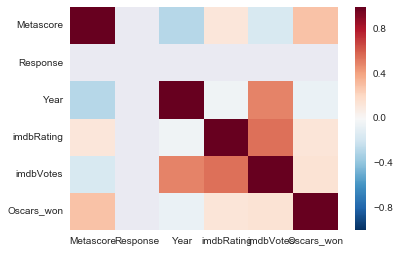

In [90]:
sns.heatmap(df2[['Actors', 'Awards', 'Country', 'Director', 'Genre',
                 'Language', 'Metascore', 'Plot', 'Poster', 'Rated', 'Released', 'Response',
                 'Runtime', 'Title', 'Type', 'Writer', 'Year', 'imdbID',
                 'imdbRating', 'imdbVotes', 'Oscars_won']].corr());

# Model: Define training set

# Model: Fit and evaluate model
Bonus: How is model at risk of overfitting?

# Present: Describe findings in blog post: summary, model, recommendations